# Background Segmentation

In [1]:
import torch
from utils import setup_data_loaders, train_model
from models.models import get_model

c:\Users\Aaron\Documents\github\background-segmentation\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 32
HEIGHT = 512
WIDTH = 384
NUM_WORKERS = 3
PIN_MEMORY = True
TRAIN_ONE_BATCH = False

In [3]:
n_epochs = 25
weight_decay = 0.05

In [4]:
train_loader, val_loader = setup_data_loaders(BATCH_SIZE, NUM_WORKERS, PIN_MEMORY, image_height=HEIGHT, image_width=WIDTH)

### Encoder: SegFormer (MitB3) - Decoder: UNet

In [5]:
lr = 1e-3


In [6]:
model = get_model(encoder="mit_b3", decoder="unet")

wandb: Currently logged in as: aaronespasa (uc3m-ml). Use `wandb login --relogin` to force relogin


c:\Users\Aaron\Documents\github\background-segmentation\venv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Training (epoch 1):   0%|          | 0/158 [00:00<?, ?it/s]c:\Users\Aaron\Documents\github\background-segmentation\venv\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
Validation (epoch 1): 100%|██████████| 47/47 [00:40<00:00,  1.15it/s]



Epoch: 1/100
	➡️ Loss --> Training: 0.1254 | Validation: 0.0797
	➡️ IoU --> Training: 92.19% | Validation: 96.14%



Validation (epoch 2): 100%|██████████| 47/47 [00:45<00:00,  1.04it/s]



Epoch: 2/100
	➡️ Loss --> Training (📉): 0.0523 | Validation (📈): 0.0916
	➡️ IoU --> Training (📈): 96.77% | Validation (📉): 95.90%



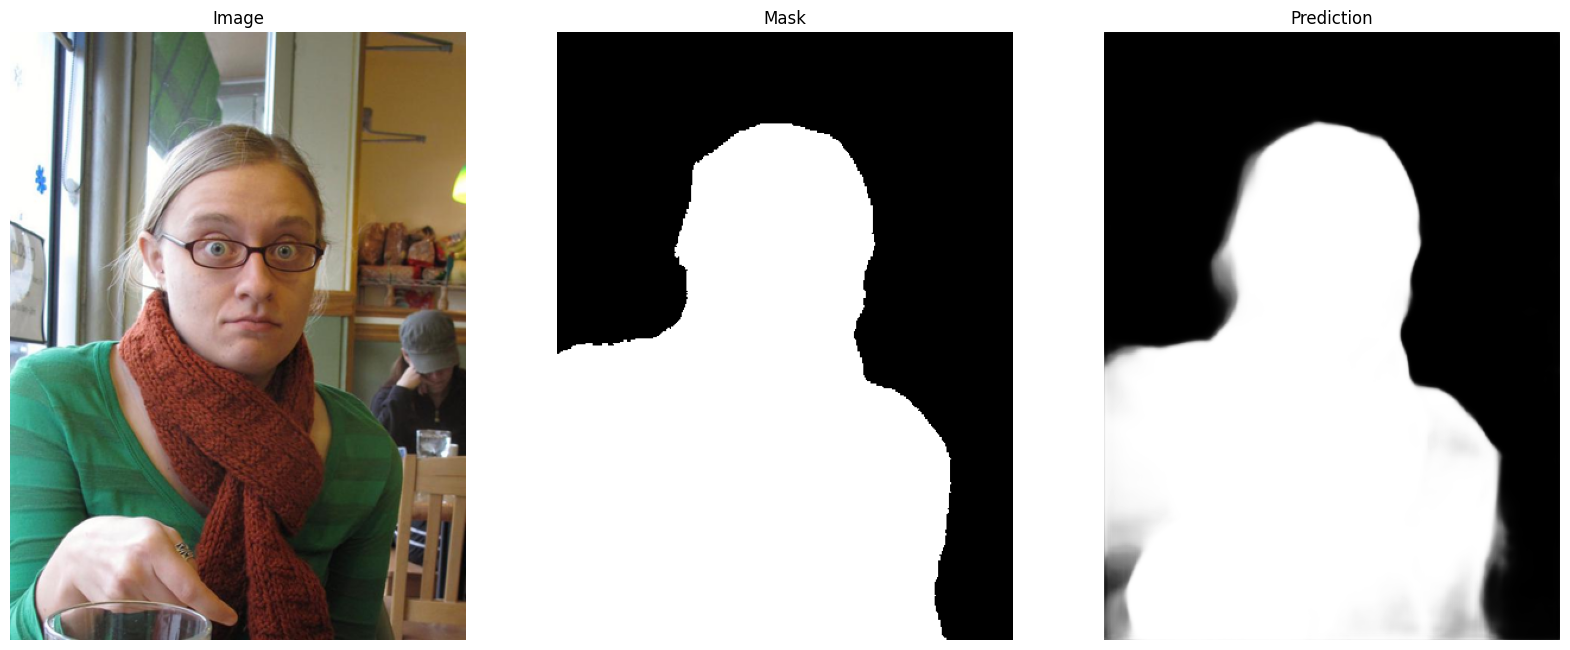

Validation (epoch 3): 100%|██████████| 47/47 [00:46<00:00,  1.01it/s]



Epoch: 3/100
	➡️ Loss --> Training (📉): 0.0448 | Validation (📉): 0.0816
	➡️ IoU --> Training (📈): 97.21% | Validation (📈): 96.11%



Validation (epoch 4): 100%|██████████| 47/47 [00:45<00:00,  1.03it/s]



Epoch: 4/100
	➡️ Loss --> Training (📈): 0.0510 | Validation (📉): 0.0778
	➡️ IoU --> Training (📉): 96.82% | Validation (📈): 96.56%



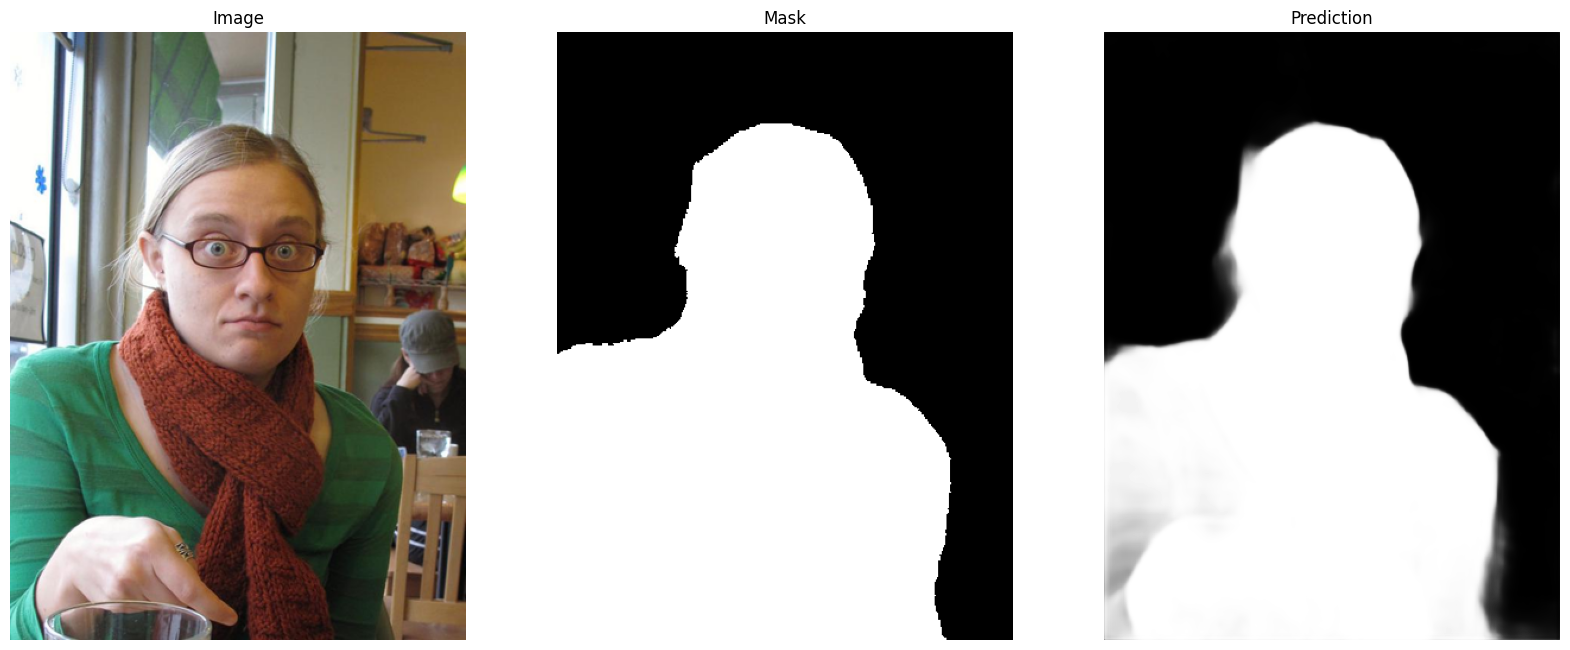

Validation (epoch 5): 100%|██████████| 47/47 [00:45<00:00,  1.03it/s]



Epoch: 5/100
	➡️ Loss --> Training (📉): 0.0367 | Validation (📉): 0.0685
	➡️ IoU --> Training (📈): 97.66% | Validation (📈): 96.74%



Validation (epoch 6): 100%|██████████| 47/47 [00:45<00:00,  1.04it/s]



Epoch: 6/100
	➡️ Loss --> Training (📈): 0.0371 | Validation (📈): 0.0760
	➡️ IoU --> Training (📉): 97.63% | Validation (📉): 96.57%



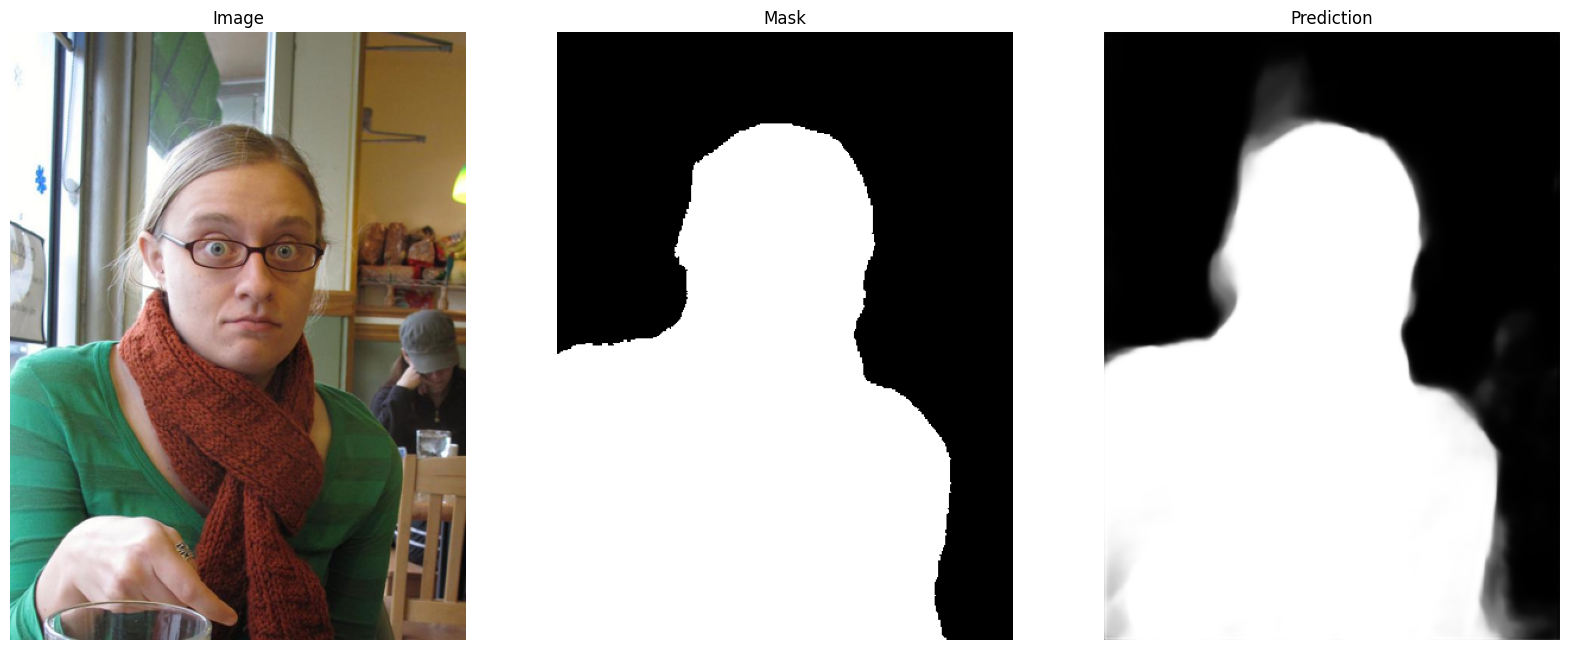

Validation (epoch 7): 100%|██████████| 47/47 [00:43<00:00,  1.07it/s]



Epoch: 7/100
	➡️ Loss --> Training (📈): 0.0381 | Validation (📈): 0.0834
	➡️ IoU --> Training (📉): 97.54% | Validation (📉): 96.11%



Validation (epoch 8): 100%|██████████| 47/47 [00:51<00:00,  1.09s/it]



Epoch: 8/100
	➡️ Loss --> Training (📉): 0.0373 | Validation (📉): 0.0793
	➡️ IoU --> Training (📈): 97.59% | Validation (📈): 96.43%



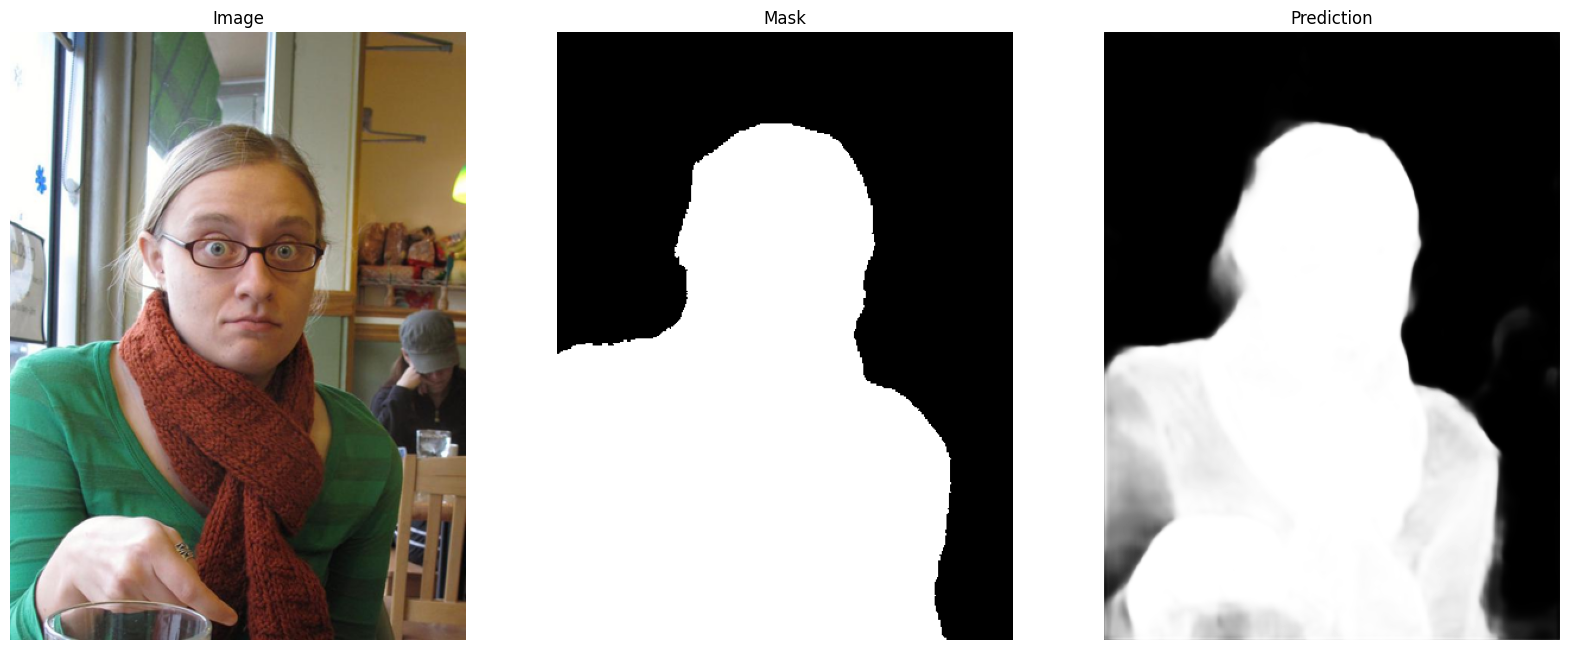

Validation (epoch 9): 100%|██████████| 47/47 [00:40<00:00,  1.16it/s]



Epoch: 9/100
	➡️ Loss --> Training (📉): 0.0339 | Validation (📉): 0.0746
	➡️ IoU --> Training (📈): 97.76% | Validation (📈): 96.58%



Validation (epoch 10): 100%|██████████| 47/47 [00:39<00:00,  1.20it/s]



Epoch: 10/100
	➡️ Loss --> Training (📈): 0.0345 | Validation (📉): 0.0734
	➡️ IoU --> Training (📉): 97.72% | Validation (📉): 96.41%



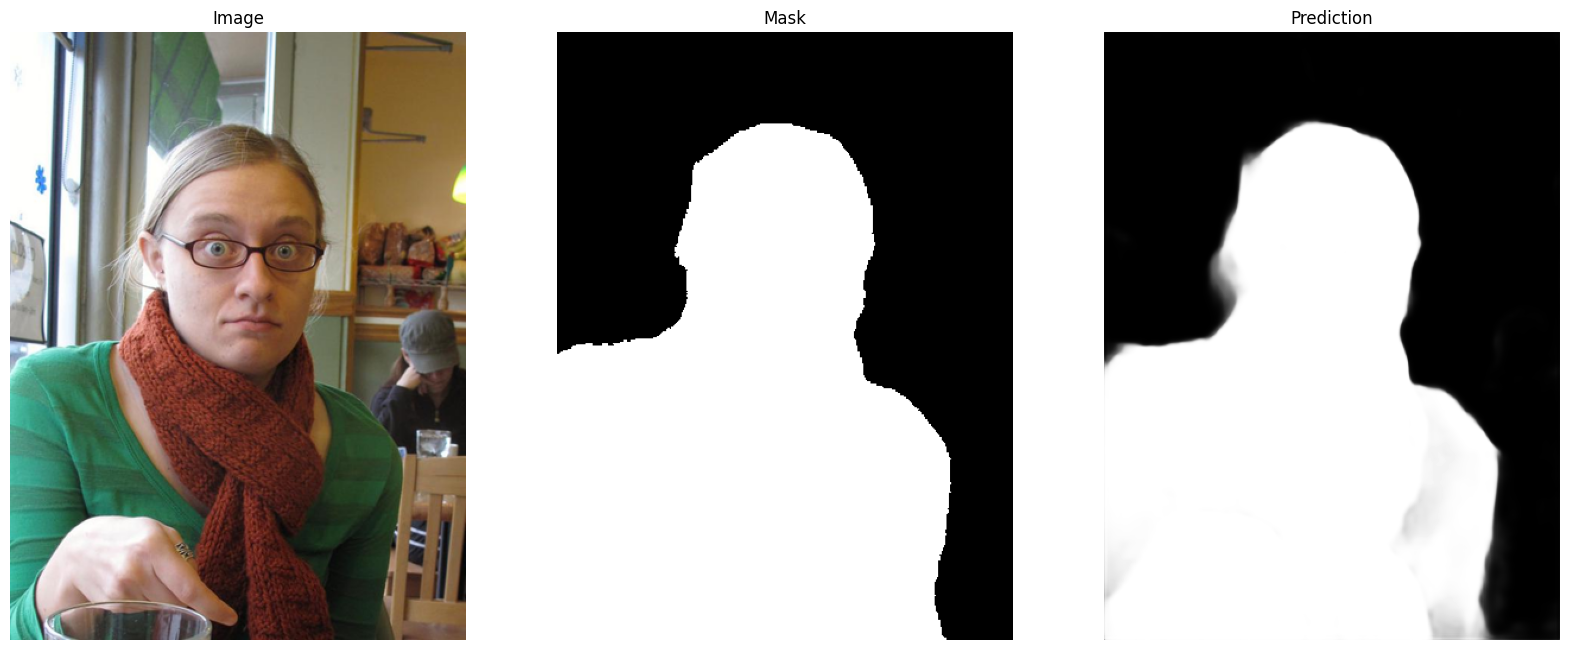

Training (epoch 11):  61%|██████▏   | 97/158 [01:29<00:55,  1.09it/s]


TypeError: finish_training() takes 2 positional arguments but 3 were given

In [7]:
train_model(model, lr, n_epochs, train_loader, val_loader, BATCH_SIZE, DEVICE, weight_decay, img_h=HEIGHT, img_w=WIDTH, model_name=f"unet_mitb3_{lr}", run_name="UNet - Segformer(MitB3)")

### Encoder: SegFormer (MitB3) - Decoder: MANet

In [ ]:
lr = 1e-3

In [7]:
model = get_model(encoder="mit_b3", decoder="manet")

In [ ]:
train_model(model, lr, n_epochs, train_loader, val_loader, BATCH_SIZE, DEVICE, weight_decay, img_h=HEIGHT, img_w=WIDTH, model_name=f"manet_mitb3_{lr}", run_name="MANet - Segformer(MitB3)")

### Encoder: SegFormer (MitB3) - Decoder: FPN

In [ ]:
lr = 1e-3

In [8]:
model = get_model(encoder="mit_b3", decoder="fpn")

In [ ]:
train_model(model, lr, n_epochs, train_loader, val_loader, BATCH_SIZE, DEVICE, weight_decay, img_h=HEIGHT, img_w=WIDTH, model_name=f"fpn_mitb3_{lr}", run_name="FPN - Segformer(MitB3)")

### Encoder: ResNet50 - Decoder: UNet

In [ ]:
lr = 1e-3

In [9]:
model = get_model(encoder="resnet50", decoder="unet")

In [ ]:
train_model(model, lr, n_epochs, train_loader, val_loader, BATCH_SIZE, DEVICE, weight_decay, img_h=HEIGHT, img_w=WIDTH, model_name=f"unet_resnet50_{lr}", run_name="UNet - ResNet50")

### Encoder: ResNet50 - Decoder: FPN

In [ ]:
lr = 1e-3

In [10]:
model = get_model(encoder="resnet50", decoder="fpn")

In [ ]:
train_model(model, lr, n_epochs, train_loader, val_loader, BATCH_SIZE, DEVICE, weight_decay, img_h=HEIGHT, img_w=WIDTH, model_name=f"fpn_resnet50_{lr}", run_name="FPN - ResNet50")

### Encoder: ResNet50 - Decoder: DeepLabV3

In [ ]:
lr = 1e-3

In [11]:
model = get_model(encoder="resnet50", decoder="fpn")

In [ ]:
train_model(model, lr, n_epochs, train_loader, val_loader, BATCH_SIZE, DEVICE, weight_decay, img_h=HEIGHT, img_w=WIDTH, model_name=f"fpn_resnet50_{lr}", run_name="FPN - ResNet50")

### Encoder: EfficientNet (B5) - Decoder: UNet

In [ ]:
lr = 1e-3

In [6]:
model = get_model(encoder="efficientnet-b5", decoder="unet")

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b5-b6417697.pth" to C:\Users\Aaron/.cache\torch\hub\checkpoints\efficientnet-b5-b6417697.pth
100%|██████████| 117M/117M [00:03<00:00, 31.3MB/s] 


In [ ]:
train_model(model, lr, n_epochs, train_loader, val_loader, BATCH_SIZE, DEVICE, weight_decay, img_h=HEIGHT, img_w=WIDTH, model_name=f"unet_efficientnetb5_{lr}", run_name="UNet - EfficientNetB5")

### Encoder: EfficientNet (B5) - Decoder: FPN

In [ ]:
lr = 1e-3

In [8]:
model = get_model(encoder="efficientnet-b5", decoder="fpn")

In [ ]:
train_model(model, lr, n_epochs, train_loader, val_loader, BATCH_SIZE, DEVICE, weight_decay, img_h=HEIGHT, img_w=WIDTH, model_name=f"fpn_efficientnetb5_{lr}", run_name="FPN - EfficientNetB5")

### Encoder: MobileOne (S4) - Decoder: UNet

In [ ]:
lr = 1e-3

In [9]:
model = get_model(encoder="mobileone_s4", decoder="unet")

Downloading: "https://docs-assets.developer.apple.com/ml-research/datasets/mobileone/mobileone_s4_unfused.pth.tar" to C:\Users\Aaron/.cache\torch\hub\checkpoints\mobileone_s4_unfused.pth.tar
100%|██████████| 57.7M/57.7M [00:02<00:00, 24.3MB/s]


In [ ]:
train_model(model, lr, n_epochs, train_loader, val_loader, BATCH_SIZE, DEVICE, weight_decay, img_h=HEIGHT, img_w=WIDTH, model_name=f"unet_mobileones4_{lr}", run_name="UNet - MobileOneS4")

### Encoder: MobileOne (S4) - Decoder: FPN

In [ ]:
lr = 1e-3

In [10]:
model = get_model(encoder="mobileone_s4", decoder="fpn")

In [ ]:
train_model(model, lr, n_epochs, train_loader, val_loader, BATCH_SIZE, DEVICE, weight_decay, img_h=HEIGHT, img_w=WIDTH, model_name=f"fpn_mobileones4_{lr}", run_name="FPN - MobileOneS4")